C:\Users\user\AppData\Local\Temp\ipykernel_8572\17046103.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2020_filtered['Continent'] = data_2020_filtered['Country'].apply(cc.convert)
C:\Users\user\AppData\Local\Temp\ipykernel_8572\17046103.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2019_filtered['Continent'] = data_2019_filtered['Country'].apply(cc.convert)


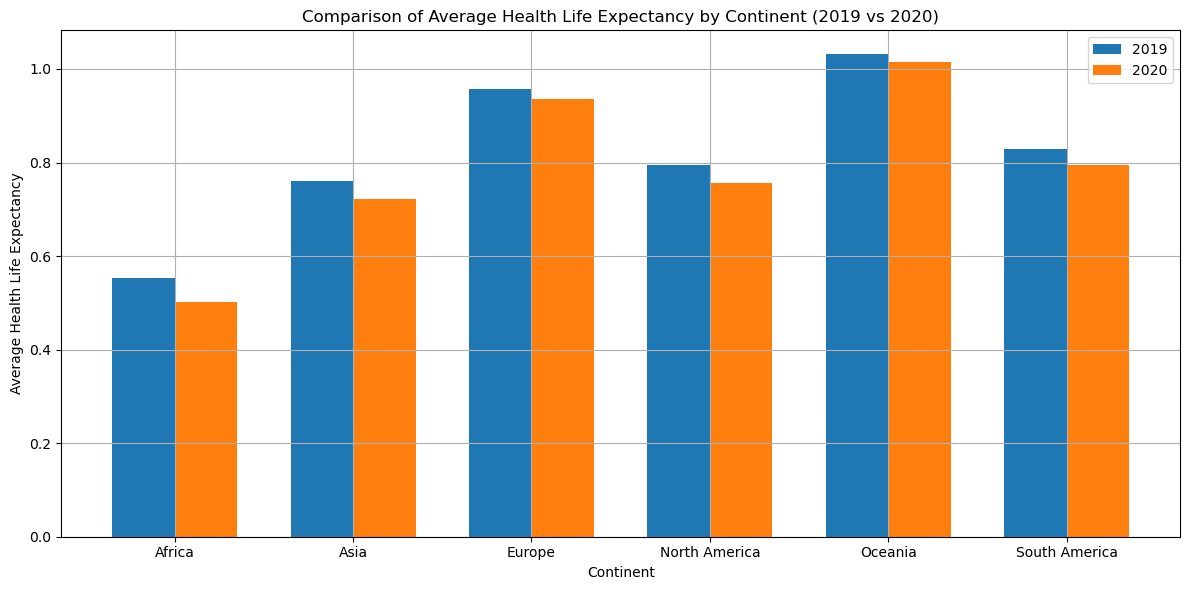

       Continent  Average Health Life Expectancy 2019  \
0         Africa                             0.553100   
1           Asia                             0.760100   
2         Europe                             0.956200   
3  North America                             0.795625   
4        Oceania                             1.031000   
5  South America                             0.828222   

   Average Health Life Expectancy 2020  
0                             0.501540  
1                             0.722666  
2                             0.935096  
3                             0.756583  
4                             1.015373  
5                             0.793755  


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from country_converter import CountryConverter

# Read the data from the CSV files
data_2020 = pd.read_csv("../data/slides/2020_data_slides.csv")
data_2019 = pd.read_csv("../data/slides/2019_data_slides.csv")

# Selecting relevant columns for the comparison
columns = ['Country', 'Health Life Expectancy']

# Filtering the data
data_2020_filtered = data_2020[columns]
data_2019_filtered = data_2019[columns]

# Initialize the CountryConverter
cc = CountryConverter()

# Map countries to continents
data_2020_filtered['Continent'] = data_2020_filtered['Country'].apply(cc.convert)
data_2019_filtered['Continent'] = data_2019_filtered['Country'].apply(cc.convert)

# Define continents and their respective countries
continents = {
    'Africa': ['Algeria', 'Egypt', 'South Africa', 'Nigeria', 'Kenya', 'Morocco', 'Ethiopia', 'Congo (Brazzaville)', 'Ghana', 'Tanzania'],
    'Asia': ['China', 'India', 'Japan', 'Indonesia', 'Pakistan', 'Bangladesh', 'Russia', 'Turkey', 'Iran', 'Saudi Arabia'],
    'Europe': ['Germany', 'France', 'United Kingdom', 'Italy', 'Spain', 'Ukraine', 'Poland', 'Romania', 'Netherlands', 'Belgium'],
    'North America': ['United States', 'Canada', 'Mexico', 'Guatemala', 'Cuba', 'Haiti', 'Dominican Republic', 'Honduras', 'El Salvador'],
    'Oceania': ['Australia', 'New Zealand', 'Papua New Guinea', 'Fiji', 'Solomon Islands', 'Vanuatu', 'Samoa', 'Tonga', 'Micronesia'],
    'South America': ['Brazil', 'Argentina', 'Peru', 'Colombia', 'Chile', 'Venezuela', 'Ecuador', 'Bolivia', 'Paraguay']
}

# Prepare data for bar plot
bar_data_2019 = []
bar_data_2020 = []

for continent, countries in continents.items():
    # Filter data for the current continent and years
    continent_2019 = data_2019_filtered[data_2019_filtered['Country'].isin(countries)]['Health Life Expectancy'].mean()
    continent_2020 = data_2020_filtered[data_2020_filtered['Country'].isin(countries)]['Health Life Expectancy'].mean()
    
    bar_data_2019.append(continent_2019)
    bar_data_2020.append(continent_2020)

# Create a bar plot
x = range(len(continents))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x, bar_data_2019, width, label='2019')
plt.bar([p + width for p in x], bar_data_2020, width, label='2020')

plt.xlabel('Continent')
plt.ylabel('Average Health Life Expectancy')
plt.title('Comparison of Average Health Life Expectancy by Continent (2019 vs 2020)')
plt.xticks([p + width/2 for p in x], continents.keys())
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

import pandas as pd

# Prepare the data in a tabular format
data = {
    'Continent': list(continents.keys()),
    'Average Health Life Expectancy 2019': bar_data_2019,
    'Average Health Life Expectancy 2020': bar_data_2020
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)



|    Continent   | Average Health Life Expectancy 2019 | Average Health Life Expectancy 2020 | Percentage Change | Absolute Difference |
|:--------------:|:------------------------------------:|:------------------------------------:|:------------------:|:-------------------:|
|    Africa      |               0.553100               |               0.501540               |      -9.33%       |       0.051560      |
|      Asia      |               0.760100               |               0.722666               |      -4.92%       |       0.037434      |
|    Europe      |               0.956200               |               0.935096               |      -2.21%       |       0.021104      |
| North America  |               0.795625               |               0.756583               |      -4.90%       |       0.039042      |
|    Oceania     |               1.031000               |               1.015373               |      -1.52%       |       0.015627      |
| South America  |               0.828222               |               0.793755               |      -4.16%       |       0.034467      |
